This is a guided example w/ some of my own code added in.

# Titanic Survival
*Jaime Avendaño*  

This is the classic Titanic dataset, available on Kaggle. The goal is to be able to analyze the passengers and determine if there were more likely to survive or not.



### Dataset:
* PassengerId - ID
* Pclass - Ticket Class (1, 2 or 3)
* Name - {Last name}, {Title} {First name} {Other names}
* Sex - male or female
* Age - age in years
* SisSp - # of siblings or spouses aboard
* Parch - # of parents or children aboard
* Ticket - Ticket #
* Fare
* Cabin 
* Embarked - Embarkation Port (C = Cherbourg, Q = Queenstown, S = Southampton)

### Target:
* Survived - (0 = No; 1 = Yes)

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import category_encoders as ce 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv('Course_Data\Train_Titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [4]:
survived = train[train.Survived == 1]


print(f'Total = {len(train)}')
print('')
print(f'# of passengers that survived = {len(survived)}')
print(f'# of passengers that survived = {len(survived) * 100 / len(train):.1f}%')
print('')
print(f'# of passengers that did not survived = {len(train) - len(survived)}')
print(f'3 of passengers that did not survived = {(len(train) - len(survived)) * 100 / len(train):.1f}%')


Total = 891

# of passengers that survived = 342
# of passengers that survived = 38.4%

# of passengers that did not survived = 549
3 of passengers that did not survived = 61.6%


<AxesSubplot:xlabel='Pclass', ylabel='count'>

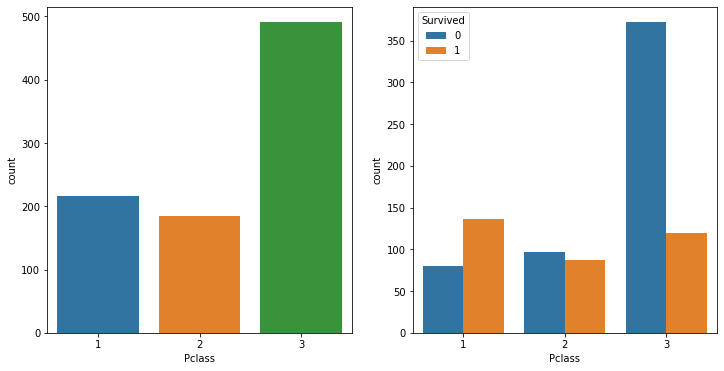

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(data=train, x='Pclass')

plt.subplot(122)
sns.countplot(data=train, x='Pclass', hue='Survived')

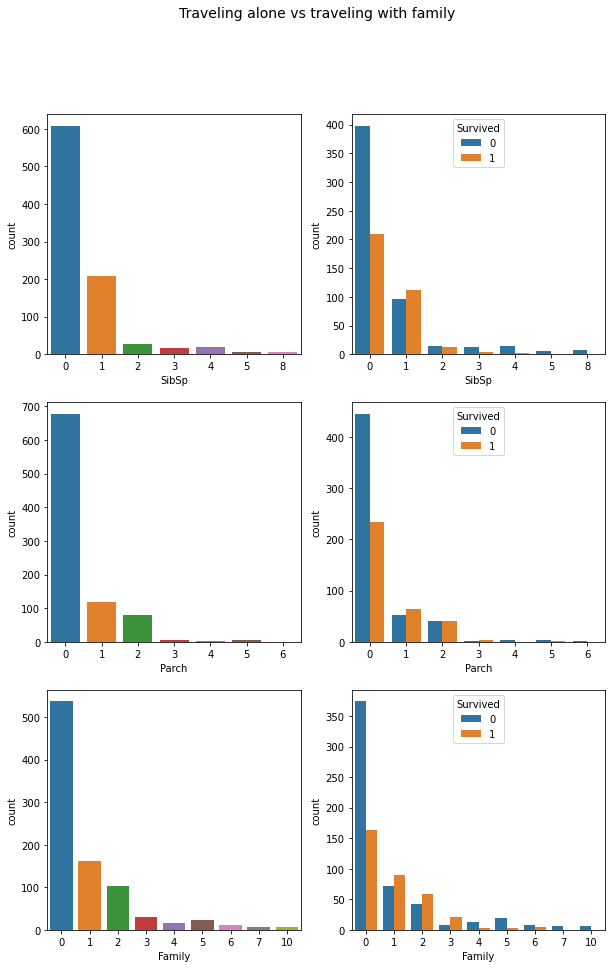

In [6]:
fig = plt.figure(figsize=(10, 15))

plt.subplot(321)
sns.countplot(data=train, x='SibSp')

plt.subplot(322)
sns.countplot(data=train, x='SibSp', hue='Survived')

plt.subplot(323)
sns.countplot(data=train, x='Parch')

plt.subplot(324)
sns.countplot(data=train, x='Parch', hue='Survived')

train['Family'] = train.SibSp + train.Parch

plt.subplot(325)
sns.countplot(data=train, x='Family')

plt.subplot(326)
sns.countplot(data=train, x='Family', hue='Survived')

fig.suptitle('Traveling alone vs traveling with family', size=14)
plt.show()

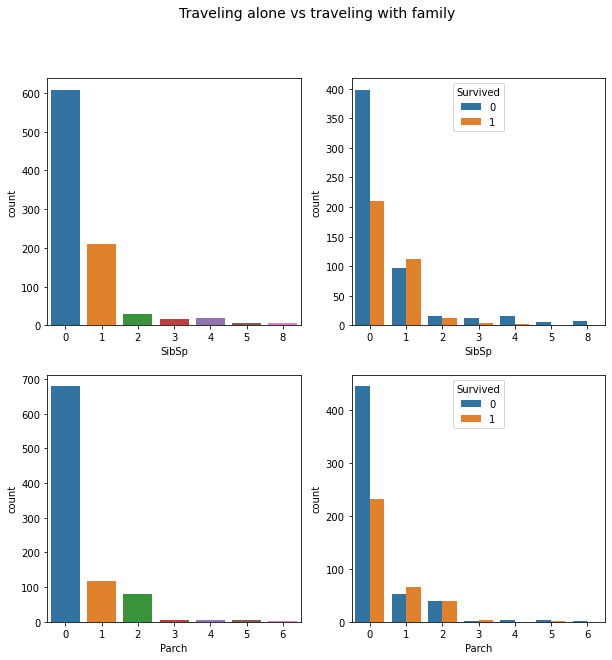

In [7]:
fig = plt.figure(figsize=(10, 10))

plt.subplot(221)
sns.countplot(data=train, x='SibSp')

plt.subplot(222)
sns.countplot(data=train, x='SibSp', hue='Survived')

plt.subplot(223)
sns.countplot(data=train, x='Parch')

plt.subplot(224)
sns.countplot(data=train, x='Parch', hue='Survived')

fig.suptitle('Traveling alone vs traveling with family', size=14)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

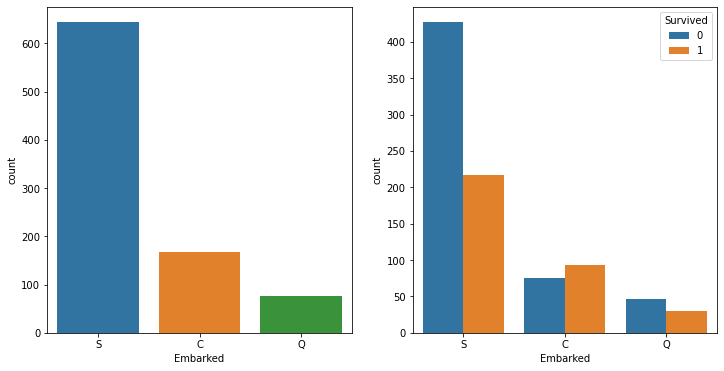

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(data=train, x='Embarked')

plt.subplot(122)
sns.countplot(data=train, x='Embarked', hue='Survived')

<AxesSubplot:xlabel='Sex', ylabel='count'>

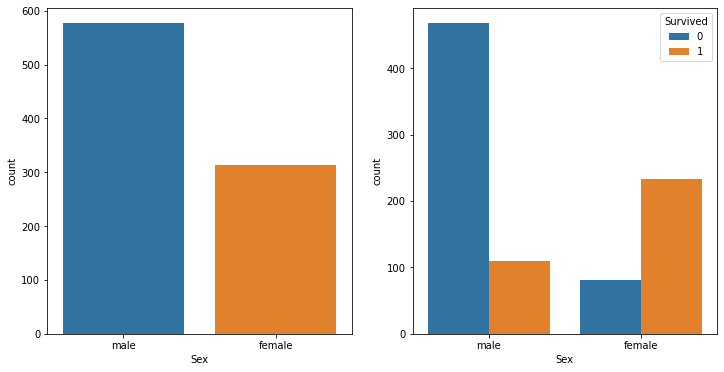

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(data=train, x='Sex')

plt.subplot(122)
sns.countplot(data=train, x='Sex', hue='Survived')

<Figure size 432x864 with 0 Axes>

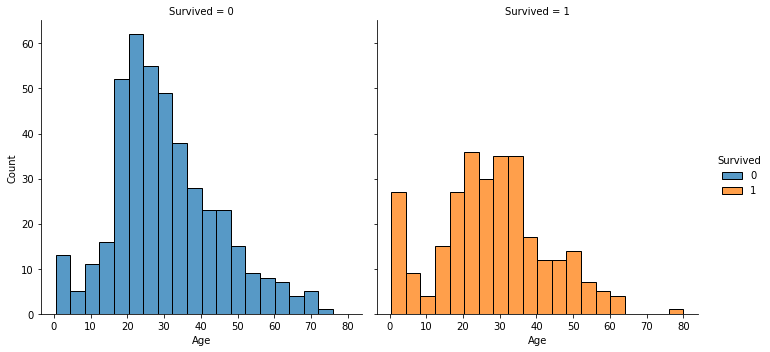

In [10]:
plt.figure(figsize=(6, 12))

sns.displot(data=train, x='Age', hue='Survived', col='Survived')

<Figure size 432x864 with 0 Axes>

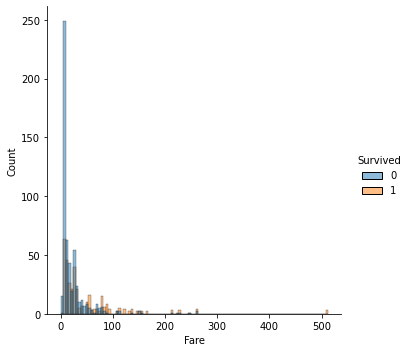

In [11]:
plt.figure(figsize=(6, 12))

sns.displot(data=train, x='Fare', hue='Survived')

# Data Cleaning

1. Remove missing data:  
  * Age - impute median by sex/class
  * Cabin - Drop column
  * Embarked - set to 'S'
2. Drop PassengerId and Ticket#
3. Drop Name (futute - feature engineer title)
4. Create Family (drop SisSp, Parch)
5. Convert Sex and Embarked to numeric.
6. Scaling Age and Fare

In [12]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Family         False
dtype: bool

In [13]:
print(f'Age missing = {train.Age.isna().sum()}')
print(f'Cabin missing = {train.Cabin.isna().sum()}')
print(f'Embarked missing = {train.Embarked.isna().sum()}')
print('')
print(train.Embarked.value_counts())

Age missing = 177
Cabin missing = 687
Embarked missing = 2

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [14]:
sex_age_median = train.groupby(['Sex', 'Pclass'])['Age'].transform('median')
train.Age = train.Age.fillna(sex_age_median)

In [15]:
train.Embarked = train.Embarked.fillna('S')

In [16]:
train = train.drop(columns=['PassengerId', 'Cabin', 'Ticket', 'Name'])

In [17]:
train['Family'] = train.SibSp + train.Parch
train = train.drop(columns=['SibSp', 'Parch'])

In [18]:
train.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
Fare        False
Embarked    False
Family      False
dtype: bool

In [19]:
sex_label_enc = LabelEncoder()
emb_oh_enc = ce.OneHotEncoder(use_cat_names=True)

sex_label_enc.fit(train.Sex)
emb_oh_enc.fit(train[['Embarked']])

train.Sex = sex_label_enc.transform(train.Sex)

emb_encoded = emb_oh_enc.transform(train[['Embarked']])
train = pd.concat([train.drop(columns=['Embarked']), 
                   emb_encoded.drop(columns=['Embarked_Q'])], axis=1)

In [20]:
st_scaler = StandardScaler()
num_features = ['Age', 'Fare', 'Pclass']

st_scaler.fit(train[num_features])
train_scaled = pd.DataFrame(st_scaler.transform(train[num_features]), columns=num_features)
train = pd.concat([train.drop(columns=num_features), train_scaled], axis=1)

In [21]:
train.head()

,Survived,Sex,Family,Embarked_S,Embarked_C,Age,Fare,Pclass
0,0,1,1,1,0,-0.534891,-0.502445,0.827377
1,1,0,1,0,1,0.668392,0.786845,-1.566107
2,1,0,0,1,0,-0.234070,-0.488854,0.827377
3,1,0,1,1,0,0.442776,0.420730,-1.566107
4,0,1,0,1,0,0.442776,-0.486337,0.827377


# Model Training

In [22]:
X = train.drop(columns=['Survived']).values
y = train.Survived.values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
classifier = LogisticRegression(max_iter = 1000, random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# Model Testing

In [25]:
y_pred = classifier.predict(X_test)

<AxesSubplot:>

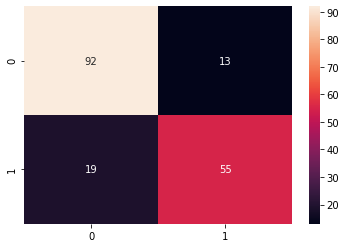

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

